In [26]:
import pandas as pd
import numpy as np

In [27]:
link = "https://www.bbc.com/sport/football/german-bundesliga/table"

In [28]:
league_data = pd.read_html(link)[0]

In [29]:
league_data = league_data.loc[0:17,"Team":"Pts"]
league_data

,Team,P,W,D,L,F,A,GD,Pts
0,Wolfsburg,0,0,0,0,0,0,0,0
1,Stuttgart,0,0,0,0,0,0,0,0
2,Hoffenheim,0,0,0,0,0,0,0,0
3,Freiburg,0,0,0,0,0,0,0,0
4,Werder Bremen,0,0,0,0,0,0,0,0
5,RB Leipzig,0,0,0,0,0,0,0,0
6,Hertha Berlin,0,0,0,0,0,0,0,0
7,Schalke,0,0,0,0,0,0,0,0
8,Bayern Munich,0,0,0,0,0,0,0,0
9,Augsburg,0,0,0,0,0,0,0,0


In [30]:
league_data.set_index("Team",inplace=True)

In [31]:
features = ["P","W","D","L","F","A","GD","Pts"]

for feature in features:
    league_data[feature] = league_data[feature].astype("int")
    
    

## Feature Engineering

In [32]:
league_data["win_ratio"] = round(league_data.W/league_data.P,2)

In [33]:
league_data["draw_ratio"] = round(league_data.D/league_data.P,2)

In [34]:
league_data["loss_ratio"] = round(league_data.L/league_data.P,2)

In [36]:
league_data["goals_scored_per_game_ratio"] = round((league_data.F/league_data.P),2)

In [37]:
league_data["total_goals_per_game_ratio"] = round(((league_data.F + league_data.A)/league_data.P),2)

In [38]:
league_data.replace(np.inf, 0,inplace=True)

In [39]:
league_data.fillna(0,inplace=True)

In [40]:
league_data

,P,W,D,L,F,A,GD,Pts,win_ratio,draw_ratio,loss_ratio,goals_scored_per_game_ratio,total_goals_per_game_ratio
Team,,,,,,,,,,,,,
Wolfsburg,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Stuttgart,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Hoffenheim,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Freiburg,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Werder Bremen,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
RB Leipzig,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Hertha Berlin,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Schalke,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Bayern Munich,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [41]:
import matplotlib.pyplot as plt

## Win Ratios

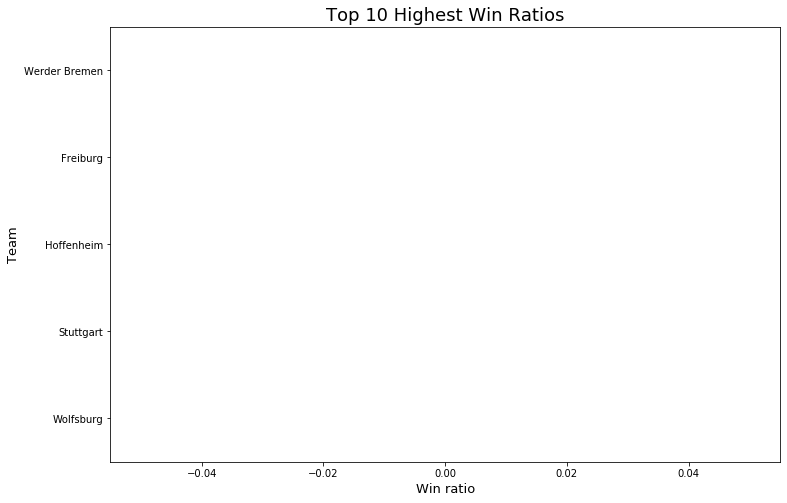

In [42]:
league_data.win_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Win ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Win Ratios",fontsize=18)
plt.show()

## Draw Ratios

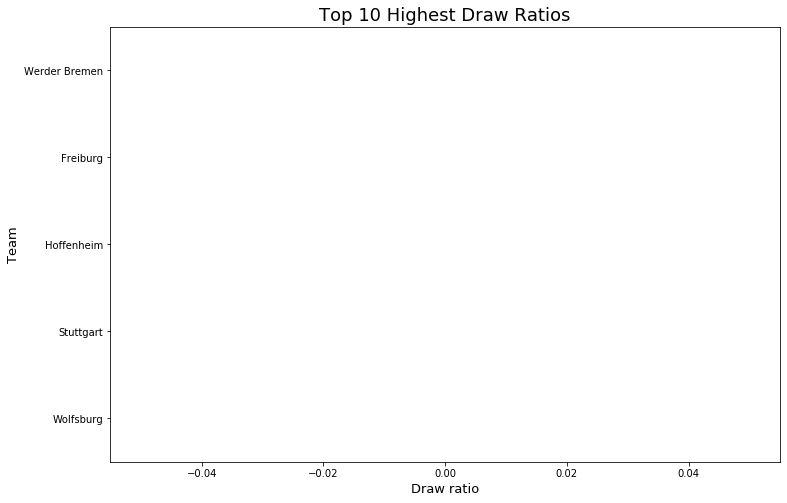

In [43]:
league_data.draw_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Draw ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Draw Ratios",fontsize=18)
plt.show()

## Loss Ratios

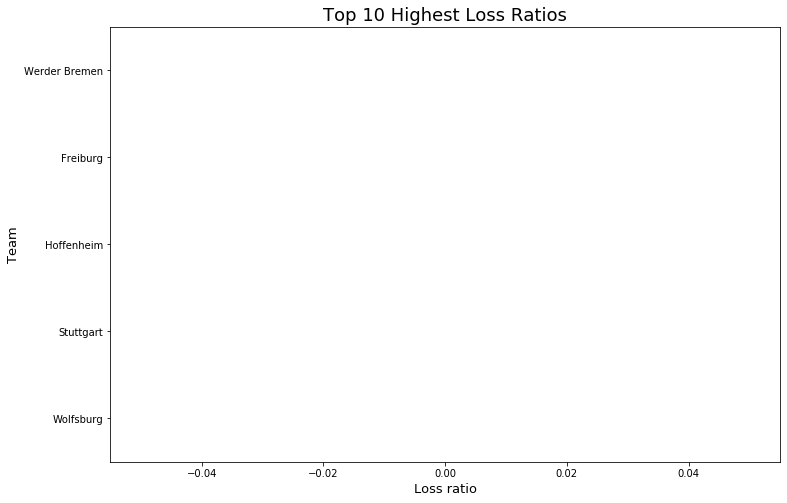

In [44]:
league_data.loss_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Loss ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Loss Ratios",fontsize=18)
plt.show()

## High Scoring Teams

In [46]:
high_scoring_teams = league_data["goals_scored_per_game_ratio"]
high_scoring_teams = high_scoring_teams.nlargest(5).to_frame()
high_scoring_teams


,goals_scored_per_game_ratio
Team,
Wolfsburg,0.0
Stuttgart,0.0
Hoffenheim,0.0
Freiburg,0.0
Werder Bremen,0.0


In [47]:
high_goals_averaging_teams = league_data["total_goals_per_game_ratio"]
high_goals_averaging_teams = high_goals_averaging_teams.nlargest(5).to_frame()
high_goals_averaging_teams

,total_goals_per_game_ratio
Team,
Wolfsburg,0.0
Stuttgart,0.0
Hoffenheim,0.0
Freiburg,0.0
Werder Bremen,0.0
